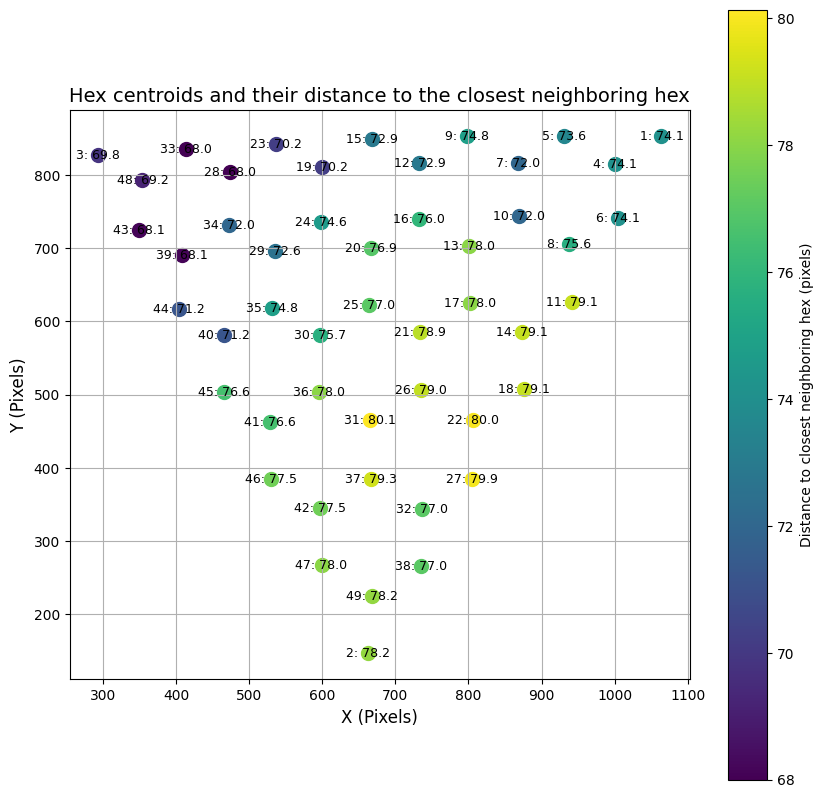

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from matplotlib import cm

hex_centroids_file = "resources/frank_lab/centroids/20240222_MazeNoBarriers_hex_coordinates.csv"
centroids_df = pd.read_csv(hex_centroids_file)
centroids_dict = centroids_df.set_index('hex')[['x', 'y']].apply(tuple, axis=1).to_dict()


def get_distance_to_nearest_neighbor2(hex_centroids):
    """
    Calculate the minimum euclidian distance to the nearest neighboring hexagon for each hex.
    
    Args:
    hex_centroids (dict): Dictionary of hex: (x, y) centroid
    
    Returns:
    dict: Dictionary with hex ID as key and minimum distance to the next hex as value
    """

    # Extract the centroids as a list of coordinates
    centroid_coords = list(hex_centroids.values())
    hex_ids = list(hex_centroids.keys())

    # Initialize a dictionary to store the minimum distance for each centroid
    min_distances = {}

    # For each centroid, calculate the distance to all other centroids
    for i, coord in enumerate(centroid_coords):
        distances = []
        for j, other_coord in enumerate(centroid_coords):
            if i != j:
                distance = euclidean(coord, other_coord)
                distances.append(distance)
        
        # Find the minimum distance and assign it to the corresponding hex ID
        min_distance = min(distances)
        min_distances[hex_ids[i]] = min_distance
    
    return min_distances


from scipy.spatial import KDTree

def get_distance_to_nearest_neighbor(hex_centroids: dict) -> dict:
    """
    Calculate the minimum euclidean distance to the closest 
    neighboring hex centroid for each hex.

    Parameters:
        hex_centroids (dict): Dictionary of hex: (x, y) centroid

    Returns:
        min_distcances (dict): Dictionary of hex: minimum distance to the nearest hex
    """
    hex_ids = list(hex_centroids.keys())
    hex_coords = list(hex_centroids.values())

    # Use KDTree to find the closest hex
    tree = KDTree(hex_coords)

    # Query the nearest neighbor (k=2 because the closest hex centroid is itself)
    distances, _ = tree.query(hex_coords, k=2)

    # The first nearest is the hex itself (distance 0), so we take the second one
    min_distances = {
        hex_id: dist[1] for hex_id, dist in zip(hex_ids, distances)
    }

    return min_distances


# Calculate minimum distances to nearest hex
min_distances = get_distance_to_nearest_neighbor(centroids_dict)

# Merge hex centroids and min distances
hex_data = {hex_id: {'coords': coords, 'min_distance': min_distances[hex_id]} for hex_id, coords in centroids_dict.items()}

# Normalize the minimum distances for coloring
min_distance_values = list(min_distances.values())
norm = plt.Normalize(min(min_distance_values), max(min_distance_values))

# Choose a colormap (you can change 'viridis' to any other colormap)
cmap = cm.viridis

# Plot hexes and annotate with their min distance
fig, ax = plt.subplots(figsize=(10, 10))

# Create a scatter plot of the hex centroids
for hex_id, data in hex_data.items():
    x, y = data['coords']
    min_distance = data['min_distance']

    # Use the normalized min_distance to determine the color from the colormap
    color = cmap(norm(min_distance))

    # Scatter plot of hex centroids with color based on size (min distance)
    ax.scatter(x, y, color=color, marker='o', s=100)

    # Annotate with the hex ID and the minimum distance
    ax.text(x, y, f'{hex_id}: {min_distance:.1f}', fontsize=9, ha='center', va='center', color='black')

# Set plot properties
ax.set_title("Hex centroids and their distance to the closest neighboring hex", fontsize=14)
ax.set_xlabel("X (Pixels)", fontsize=12)
ax.set_ylabel("Y (Pixels)", fontsize=12)
ax.grid(True)
ax.set_aspect('equal', adjustable='box') 

# Add a colorbar to show the scale of the minimum distances
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(min_distance_values)
fig.colorbar(sm, ax=ax, label="Distance to closest neighboring hex (pixels)")

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

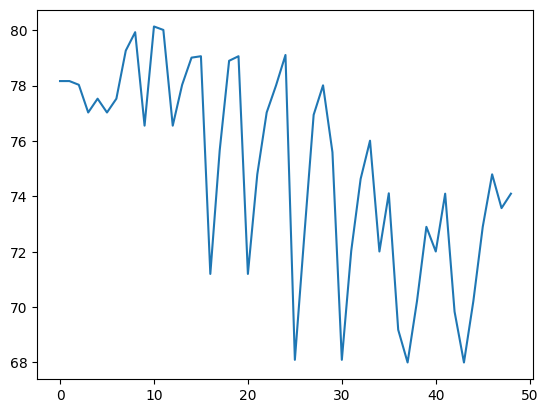

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(sizes)
plt.show